In [7]:
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
# from fetch_data import FetchLidarData
from fetch_data import FetchLidarData


In [12]:
import geopandas as gpd
from shapely.geometry import Polygon

MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
data_Path = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/"
region = "IA_FullState"
pipeline_path = "../data/pipeline.json"


fl = FetchLidarData(polygon,data_Path, pipeline_path)
df = fl.get_elevation(region)

POLYGON((-10436887.43333523 5148706.389047224, -10436887.43333523 5149217.145836504, -10435905.484106943 5149217.145836504, -10435905.484106943 5148706.389047224, -10436887.43333523 5148706.389047224))
([-10436887.43333523, -10435905.484106943],[5148706.389047224, 5149217.145836504])
writers.las: Couldn't open file 'laz/IA_FullState.laz' for output.


TypeError: 'NoneType' object is not subscriptable

In [7]:
df

,Elevation,geometry
0,317.59,POINT Z (-93.74864 41.92142 317.59000)
1,317.42,POINT Z (-93.74863 41.92142 317.42000)
2,317.27,POINT Z (-93.74862 41.92142 317.27000)
3,317.28,POINT Z (-93.74865 41.92142 317.28000)
4,317.25,POINT Z (-93.74867 41.92142 317.25000)
...,...,...
403326,315.87,POINT Z (-93.74813 41.91870 315.87000)
403327,315.87,POINT Z (-93.74835 41.91870 315.87000)
403328,315.96,POINT Z (-93.74833 41.91870 315.96000)
403329,315.88,POINT Z (-93.74845 41.91870 315.88000)


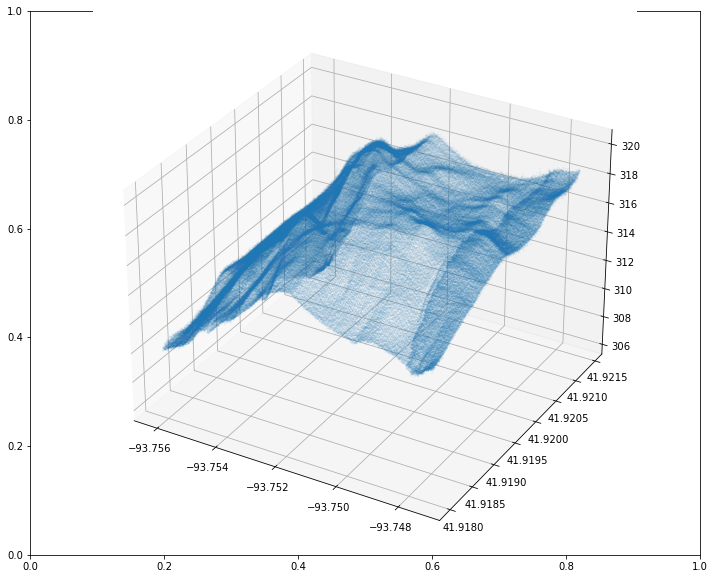

In [8]:
fl.plot_terrain_3d(df, size=0.002)

In [9]:
# actual subsampling
dfs = fl.subsample(df, 2)
dfs

,Elevation,geometry
0,307.499015,POINT (-93.75591 41.92106)
1,309.433184,POINT (-93.75571 41.92045)
2,311.337884,POINT (-93.75549 41.91953)
3,313.335724,POINT (-93.75445 41.91939)
4,315.295194,POINT (-93.75235 41.91922)
5,317.457156,POINT (-93.75000 41.92001)
6,318.720444,POINT (-93.75155 41.91991)


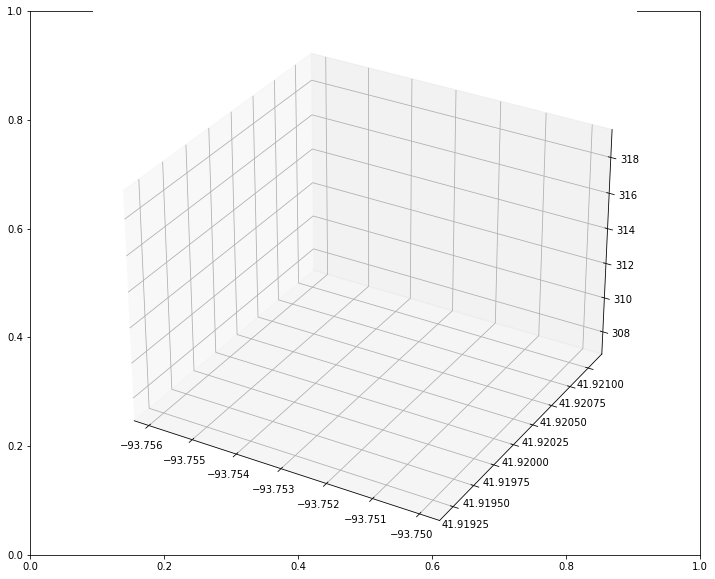

In [10]:
# plotting the subsampled point cloud data
fl.plot_terrain_3d(dfs, size=0.002)